In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [6]:
#loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
customer = df.copy()

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [14]:
# no need of customerID for our classificatiom
df = df.drop(['customerID'], axis = 1)
df.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(7021, 20)

In [16]:
df.duplicated().sum()

0

## Preprocessing

In [18]:
# just Yes,no in onlinesecurity column

df["OnlineSecurity"].unique()
df["OnlineSecurity"].replace("No internet service","No", inplace = True)

In [19]:
df["OnlineSecurity"].isna().sum()

0

In [20]:
# gender Column

df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
df["gender"].isna().sum()

0

In [22]:
# Senior Citizen

df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [23]:
df["SeniorCitizen"].isna().sum()

0

In [24]:
# Partner Column

df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df["Partner"].isna().sum()

0

In [26]:
# Dependents Column

df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df["Dependents"].isna().sum()

0

In [28]:
df['tenure'].value_counts()

tenure
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [29]:
for col in df.columns:
    print(f"Column Name = {col}")
    print(df[col].unique(), df[col].isna().sum(), "\n")

Column Name = gender
['Female' 'Male'] 0 

Column Name = SeniorCitizen
[0 1] 0 

Column Name = Partner
['Yes' 'No'] 0 

Column Name = Dependents
['No' 'Yes'] 0 

Column Name = tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 0 

Column Name = PhoneService
['No' 'Yes'] 0 

Column Name = MultipleLines
['No phone service' 'No' 'Yes'] 0 

Column Name = InternetService
['DSL' 'Fiber optic' 'No'] 0 

Column Name = OnlineSecurity
['No' 'Yes'] 0 

Column Name = OnlineBackup
['Yes' 'No' 'No internet service'] 0 

Column Name = DeviceProtection
['No' 'Yes' 'No internet service'] 0 

Column Name = TechSupport
['No' 'Yes' 'No internet service'] 0 

Column Name = StreamingTV
['No' 'Yes' 'No internet service'] 0 

Column Name = StreamingMovies
['No' 'Yes' 'No internet service'] 0 

Column Name = Contract
['Month-to-month

In [30]:
df["MultipleLines"].replace("No phone service","No", inplace = True)

In [31]:
df["OnlineBackup"].replace("No internet service","No", inplace = True)

In [32]:
df["DeviceProtection"].replace("No internet service","No", inplace = True)

In [33]:
df["TechSupport"].replace("No internet service","No", inplace = True)

In [34]:
df["StreamingMovies"].replace("No internet service","No", inplace = True)

In [35]:
df["StreamingTV"].replace("No internet service","No", inplace = True)

In [38]:
for col in df.columns:
    print(f"Column Name = {col}")
    print(df[col].unique(), df[col].isna().sum(), "\n")

Column Name = gender
['Female' 'Male'] 0 

Column Name = SeniorCitizen
[0 1] 0 

Column Name = Partner
['Yes' 'No'] 0 

Column Name = Dependents
['No' 'Yes'] 0 

Column Name = tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 0 

Column Name = PhoneService
['No' 'Yes'] 0 

Column Name = MultipleLines
['No' 'Yes'] 0 

Column Name = InternetService
['DSL' 'Fiber optic' 'No'] 0 

Column Name = OnlineSecurity
['No' 'Yes'] 0 

Column Name = OnlineBackup
['Yes' 'No'] 0 

Column Name = DeviceProtection
['No' 'Yes'] 0 

Column Name = TechSupport
['No' 'Yes'] 0 

Column Name = StreamingTV
['No' 'Yes'] 0 

Column Name = StreamingMovies
['No' 'Yes'] 0 

Column Name = Contract
['Month-to-month' 'One year' 'Two year'] 0 

Column Name = PaperlessBilling
['Yes' 'No'] 0 

Column Name = PaymentMethod
['Electronic check' 'Mai

In [41]:
# Encoding 
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0 )

'''
lambda x: 1 if x == 'Male' else 0:
This is an inline function (lambda) that returns:

1 if the value is 'Male'

0 otherwise (e.g., 'Female' or any other value)

'''

"\nlambda x: 1 if x == 'Male' else 0:\nThis is an inline function (lambda) that returns:\n\n1 if the value is 'Male'\n\n0 otherwise (e.g., 'Female' or any other value)\n\n"

In [44]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
columns = ['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling','Churn']

In [51]:
for col in columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0 )

In [54]:
for col in df.columns:
    print(f"Column Name = {col}")
    print(df[col].unique(), df[col].isna().sum(), "\n")

Column Name = gender
[0 1] 0 

Column Name = SeniorCitizen
[0 1] 0 

Column Name = Partner
[1 0] 0 

Column Name = Dependents
[0 1] 0 

Column Name = tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 0 

Column Name = PhoneService
[0 1] 0 

Column Name = MultipleLines
[0 1] 0 

Column Name = InternetService
['DSL' 'Fiber optic' 'No'] 0 

Column Name = OnlineSecurity
[0 1] 0 

Column Name = OnlineBackup
[1 0] 0 

Column Name = DeviceProtection
[0 1] 0 

Column Name = TechSupport
[0 1] 0 

Column Name = StreamingTV
[0 1] 0 

Column Name = StreamingMovies
[0 1] 0 

Column Name = Contract
['Month-to-month' 'One year' 'Two year'] 0 

Column Name = PaperlessBilling
[1 0] 0 

Column Name = PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 0 

Column Name = Mont

In [58]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

In [62]:
# can we drop this column?
df['InternetService'] = df['InternetService'].apply(lambda x: 1 if ((x == 'DSL') or (x == 'Fiber optic')) else 0 )

In [67]:
for col in df.columns:
    print(f"Column Name = {col}")
    print(df[col].unique(), df[col].isna().sum(), "\n")

Column Name = gender
[0 1] 0 

Column Name = SeniorCitizen
[0 1] 0 

Column Name = Partner
[1 0] 0 

Column Name = Dependents
[0 1] 0 

Column Name = tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 0 

Column Name = PhoneService
[0 1] 0 

Column Name = MultipleLines
[0 1] 0 

Column Name = InternetService
[1 0] 0 

Column Name = OnlineSecurity
[0 1] 0 

Column Name = OnlineBackup
[1 0] 0 

Column Name = DeviceProtection
[0 1] 0 

Column Name = TechSupport
[0 1] 0 

Column Name = StreamingTV
[0 1] 0 

Column Name = StreamingMovies
[0 1] 0 

Column Name = Contract
['Month-to-month' 'One year' 'Two year'] 0 

Column Name = PaperlessBilling
[1 0] 0 

Column Name = PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 0 

Column Name = MonthlyCharges
[29.85 56.

In [68]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [71]:
df.rename(columns={'gender': 'is_male'}, inplace=True)


In [78]:
col = ['Contract', 'PaymentMethod']

In [80]:
encoded = pd.get_dummies(df, columns=col, dtype="int")
encoded

,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.5,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,84.80,1990.5,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,1,0,1,...,103.20,7362.9,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,1,0,0,...,74.40,306.6,1,1,0,0,0,0,0,1


In [82]:
encoded["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [84]:
encoded["TotalCharges"] = pd.to_numeric(encoded["TotalCharges"], errors='coerce')


In [86]:
encoded["TotalCharges"].isna().sum()

11

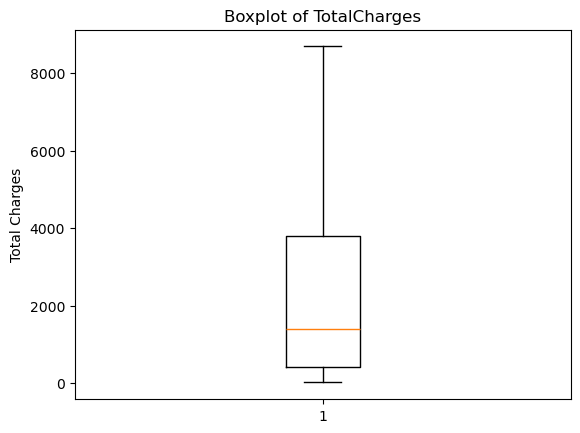

In [87]:
import matplotlib.pyplot as plt

plt.boxplot(encoded["TotalCharges"].dropna())  # drop NaNs to avoid issues
plt.title("Boxplot of TotalCharges")
plt.ylabel("Total Charges")
plt.show()

# no outliers

In [89]:
mean = encoded["TotalCharges"].mean()
mean

2290.3533880171185

In [90]:
encoded["TotalCharges"] = encoded["TotalCharges"].fillna(mean)

In [92]:
encoded["TotalCharges"].isna().sum()

0

In [93]:
encoded.dtypes

is_male                                      int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int32
Contract_One year              

In [95]:
encoded

,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,84.80,1990.50,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,1,0,1,...,103.20,7362.90,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,1,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [96]:
encoded['SeniorCitizen'].value_counts() 

SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64

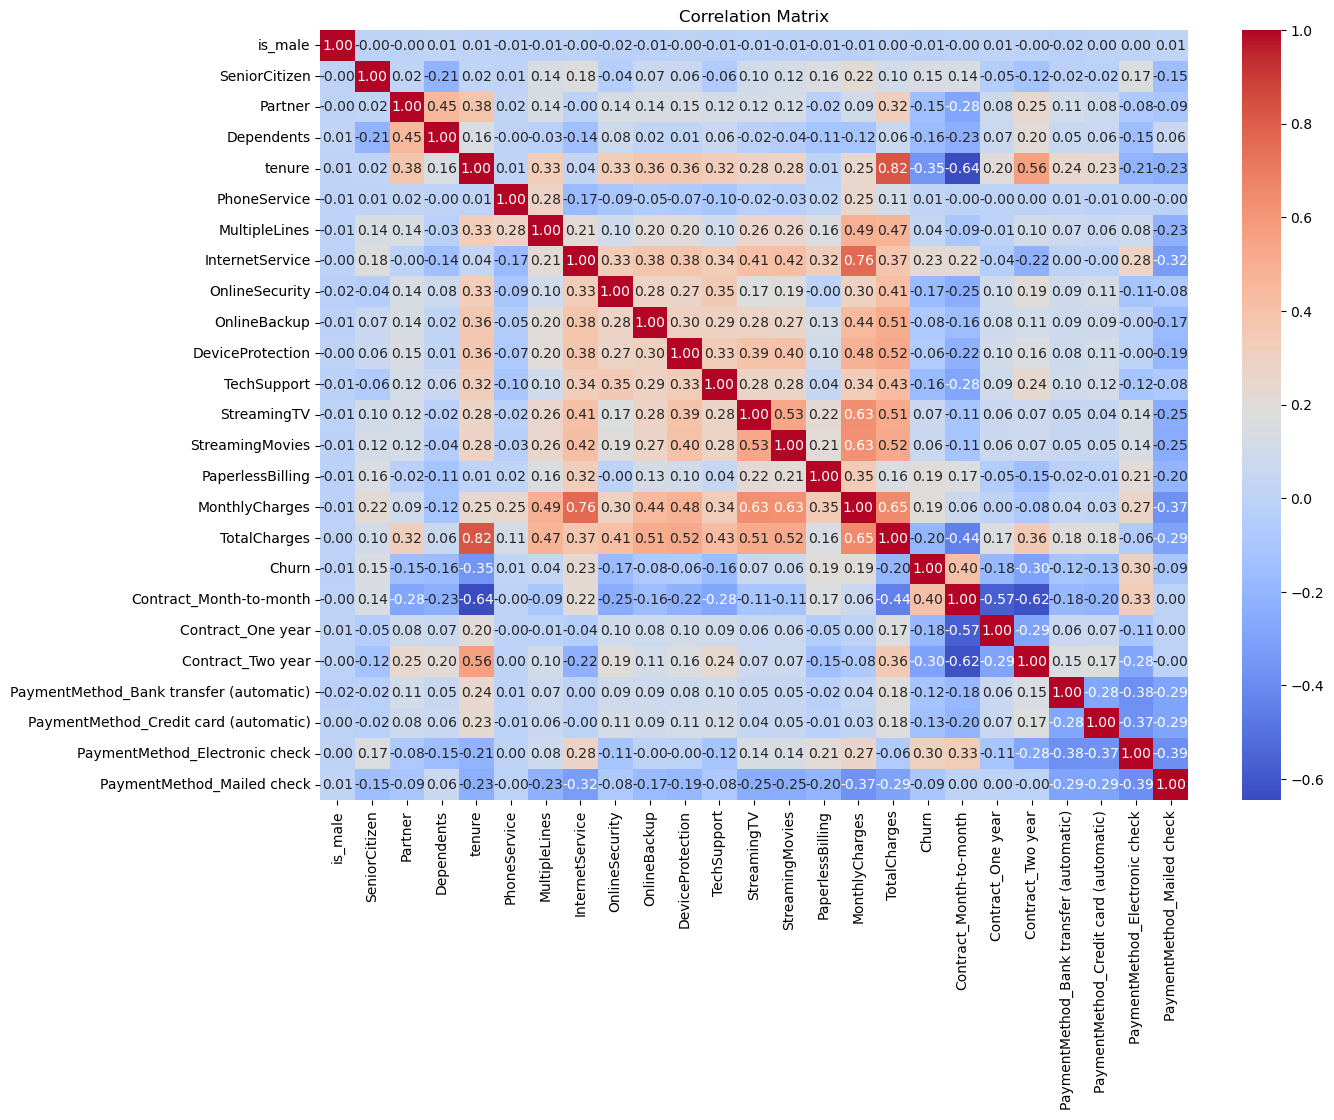

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Now we Need to Scale

In [100]:
X = encoded.drop(columns = "Churn")
y = encoded["Churn"]

In [104]:
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)
scaler.feature_names_in_

array(['is_male', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [105]:
new_X = pd.DataFrame(standardized_X, columns = scaler.feature_names_in_)

In [106]:
new_X

,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.008726,-0.440508,1.031400,-0.655475,-1.282728,-3.048725,-0.856493,0.523889,-0.635326,1.374951,...,0.829057,-1.164135,-0.998066,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,1.405796,-0.542396
1,0.991349,-0.440508,-0.969556,-0.655475,0.062387,0.328006,-0.856493,0.523889,1.573996,-0.727299,...,-1.206190,-0.262811,-0.176986,-1.102826,1.940738,-0.564137,-0.530948,-0.526097,-0.711341,1.843671
2,0.991349,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.856493,0.523889,1.573996,1.374951,...,0.829057,-0.365914,-0.963495,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,-0.711341,1.843671
3,0.991349,-0.440508,-0.969556,-0.655475,0.510759,-3.048725,-0.856493,0.523889,1.573996,-0.727299,...,-1.206190,-0.750058,-0.198511,-1.102826,1.940738,-0.564137,1.883422,-0.526097,-0.711341,-0.542396
4,-1.008726,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.856493,0.523889,-0.635326,-0.727299,...,0.829057,0.194503,-0.944289,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,1.405796,-0.542396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,0.991349,-0.440508,1.031400,1.525611,-0.345224,0.328006,1.167552,0.523889,1.573996,-0.727299,...,0.829057,0.663458,-0.132392,-1.102826,1.940738,-0.564137,-0.530948,-0.526097,-0.711341,1.843671
7017,-1.008726,-0.440508,1.031400,1.525611,1.611307,0.328006,1.167552,0.523889,-0.635326,1.374951,...,0.829057,1.275428,2.239651,-1.102826,1.940738,-0.564137,-0.530948,1.900792,-0.711341,-0.542396
7018,-1.008726,-0.440508,1.031400,1.525611,-0.875118,-3.048725,-0.856493,0.523889,1.573996,-0.727299,...,0.829057,-1.172450,-0.858280,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,1.405796,-0.542396
7019,0.991349,2.270104,1.031400,-0.655475,-1.160445,0.328006,1.167552,0.523889,-0.635326,-0.727299,...,0.829057,0.317562,-0.875875,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,-0.711341,1.843671


In [107]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7021, dtype: int64

In [109]:
import numpy as np

y_array = y.to_numpy().reshape(-1, 1)  # now 2D

y_array

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [112]:
new_y = pd.DataFrame(y)

In [114]:
new_y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


## Applying Models

### Decision Trees 

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y, random_state = 43, test_size = 0.20)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [127]:
y_pred_gini = clf_gini.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7879


In [130]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [131]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7867


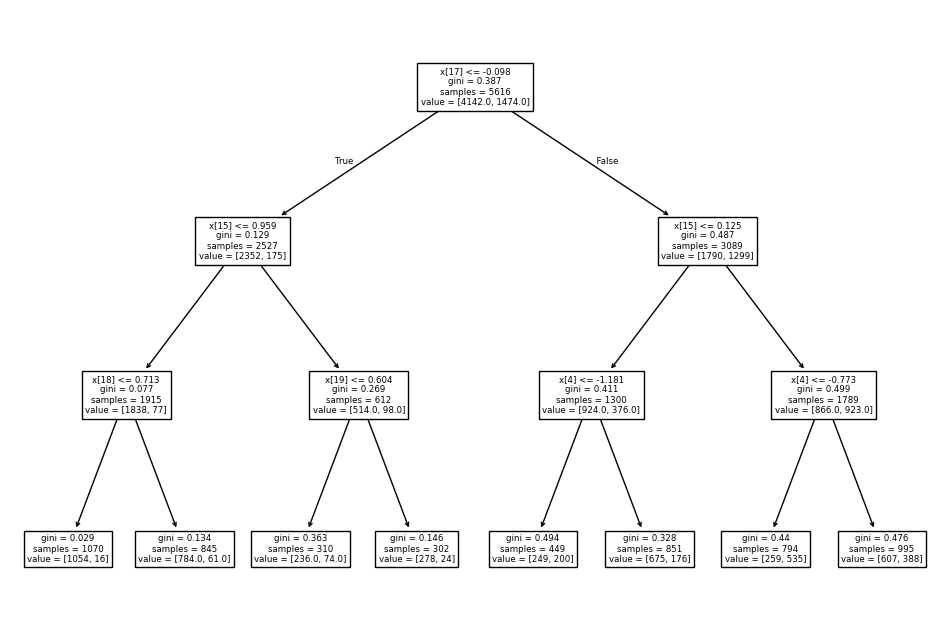

In [132]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

In [133]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [134]:
y_pred_en = clf_en.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7922


In [136]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7986


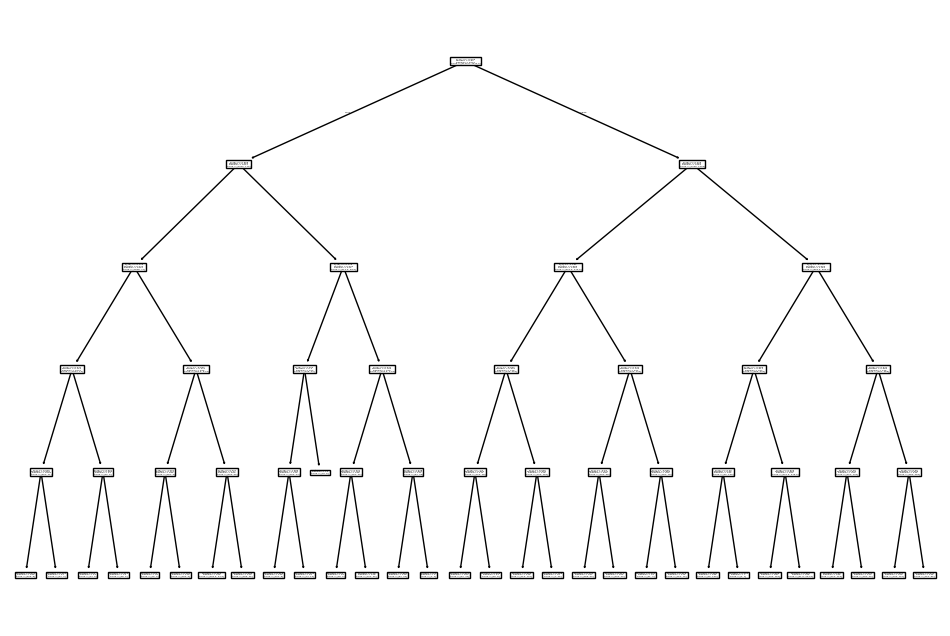

In [137]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

In [138]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[898 124]
 [168 215]]


In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1022
           1       0.63      0.56      0.60       383

    accuracy                           0.79      1405
   macro avg       0.74      0.72      0.73      1405
weighted avg       0.79      0.79      0.79      1405



**Pruning** in decision trees is the process of **removing unnecessary branches** from the tree to improve its performance on unseen data and reduce overfitting.

---

### 🔍 Why pruning is needed:

* When a decision tree is fully grown, it may **overfit** the training data, capturing noise and small fluctuations.
* A very deep tree may have **high accuracy on training data** but perform **poorly on test data**.

---

### 🌲 Types of Pruning:

1. **Pre-Pruning (Early Stopping)**:

   * Stop growing the tree **before** it becomes too complex.
   * Examples:

     * Set a **maximum depth**.
     * Require a **minimum number of samples** to split a node.
     * Set a threshold for **information gain** or **Gini impurity**.

2. **Post-Pruning (Cost Complexity Pruning)**:

   * Grow the full tree first, then **remove branches** that do not add much predictive power.
   * Common technique in CART (Classification and Regression Trees):

     * Use a parameter **α (alpha)** to balance tree size vs accuracy.
     * Try multiple trees with different levels of pruning and **select the best one using cross-validation**.

---

### ✅ Benefits of Pruning:

* **Reduces overfitting**
* **Improves generalization** on test data
* **Simplifies** the model (smaller trees are easier to interpret)

---

### 🔧 In Scikit-Learn:

```python
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(ccp_alpha=0.01)  # post-pruning with cost-complexity pruning
clf.fit(X_train, y_train)
```

Let me know if you'd like a visual or code example to see how pruning affects a tree.


Class balancing in machine learning is a technique used to deal with **imbalanced datasets**, where one class significantly outnumbers the other(s). This imbalance can lead to poor model performance, especially in classification tasks, because most algorithms tend to **favor the majority class**, ignoring the minority one (which is often the class of interest).

---

## ✅ Why Class Balancing Matters

Suppose you're predicting fraud:

* **99% non-fraud**, 1% fraud.
* A model that always predicts **non-fraud** gets 99% accuracy — but it's useless.

---

## ⚙️ How Class Balancing Works

There are **three main approaches** to balance classes:

---

### 🔁 1. **Resampling Techniques**

#### a) **Oversampling** (adds more minority class samples)

* Replicates existing minority samples or creates synthetic ones (e.g. **SMOTE**).
* Pros: Retains all majority data.
* Cons: Risk of overfitting on duplicated/similar samples.

✅ **Common Oversampling Method:**

* **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates new samples by interpolating between minority class neighbors.

#### b) **Undersampling** (removes some majority class samples)

* Randomly drops majority class examples.
* Pros: Faster training, balanced data.
* Cons: May lose important information.

#### c) **Combination** (e.g. SMOTE + Tomek Links)

---

### ⚖️ 2. **Class Weighting**

Adjusts the importance of each class **within the loss function**.

✅ Examples:

* `class_weight='balanced'` in scikit-learn models (e.g., `LogisticRegression`, `RandomForestClassifier`).
* In neural nets: use weighted loss functions (e.g., `WeightedCrossEntropyLoss`).

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
```

---

### 🧠 3. **Algorithmic Adjustments**

Some algorithms (e.g., XGBoost, LightGBM) have **built-in support** for handling class imbalance through parameters like:

* `scale_pos_weight` in XGBoost
* `is_unbalance` in LightGBM

---

## 📊 Which Method to Use?

| Situation                | Recommendation                    |
| ------------------------ | --------------------------------- |
| Small dataset            | Oversampling (SMOTE)              |
| Large dataset            | Undersampling                     |
| High imbalance, big data | Combine SMOTE + undersampling     |
| Using tree-based models  | Try built-in class weight options |
| Neural networks          | Use weighted loss                 |

---

Let me know if you want a **real-world example (e.g., fraud, churn, etc.)** or how to **evaluate models** on imbalanced data (e.g., precision-recall, ROC, F1).


In [142]:
# Class Balancing

In [143]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_bal))


Before SMOTE: Counter({'Churn': 1})
After SMOTE: Counter({'Churn': 1})


In [144]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [145]:
y_pred = clf_en.predict(X_test)

In [146]:
y_pred_en = clf_en.predict(X_train_bal)

In [147]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.7302


In [148]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [149]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7179


In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1022
           1       0.50      0.79      0.61       383

    accuracy                           0.73      1405
   macro avg       0.70      0.75      0.70      1405
weighted avg       0.79      0.73      0.74      1405



In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_train_bal, y_pred_en))

              precision    recall  f1-score   support

           0       0.78      0.70      0.73      4142
           1       0.72      0.80      0.76      4142

    accuracy                           0.75      8284
   macro avg       0.75      0.75      0.75      8284
weighted avg       0.75      0.75      0.75      8284



Certainly! Here's a complete, self-contained explanation of **Precision** and **Recall** using an easy **Spam Detection example**, with step-by-step **confusion matrix**, **calculations**, and final **classification report** — just like what you'd get from a machine learning model.

---

## 📨 **Spam Detection Example (Binary Classification)**

Suppose your model predicts whether an email is **Spam (1)** or **Not Spam (0)**. You test it on **20 emails**, and get the following results:

---

### 📊 Confusion Matrix

|                         | **Predicted: Spam (1)** | **Predicted: Not Spam (0)** |
| ----------------------- | ----------------------- | --------------------------- |
| **Actual Spam (1)**     | ✅ **7 (TP)**            | ❌ **3 (FN)**                |
| **Actual Not Spam (0)** | ❌ **2 (FP)**            | ✅ **8 (TN)**                |

---

## 📌 Definitions

* **TP (True Positives)**: Model predicted Spam and it was Spam → **7**
* **FP (False Positives)**: Model predicted Spam but it was Not Spam → **2**
* **TN (True Negatives)**: Model predicted Not Spam and it was Not Spam → **8**
* **FN (False Negatives)**: Model predicted Not Spam but it was Spam → **3**

---

## 🔢 1. **Precision and Recall for Class 1 (Spam)**

### 📍 Precision (Class 1):

$$
\text{Precision}_{1} = \frac{TP}{TP + FP} = \frac{7}{7 + 2} = \frac{7}{9} \approx 0.78
$$

**Interpretation**: When the model predicts **Spam**, it’s right **78%** of the time.

---

### 📍 Recall (Class 1):

$$
\text{Recall}_{1} = \frac{TP}{TP + FN} = \frac{7}{7 + 3} = \frac{7}{10} = 0.70
$$

**Interpretation**: The model correctly finds **70%** of all actual spam emails.

---

## 🔢 2. **Precision and Recall for Class 0 (Not Spam)**

Now flip the perspective: Treat **Not Spam (0)** as the positive class.

### 📍 Precision (Class 0):

We look at how many predicted **Not Spam (0)** were actually **Not Spam**:

$$
\text{Precision}_{0} = \frac{TN}{TN + FN} = \frac{8}{8 + 3} = \frac{8}{11} \approx 0.727
$$

**Interpretation**: When the model predicts **Not Spam**, it’s correct **72.7%** of the time.

---

### 📍 Recall (Class 0):

We look at how many actual **Not Spam** were correctly predicted:

$$
\text{Recall}_{0} = \frac{TN}{TN + FP} = \frac{8}{8 + 2} = \frac{8}{10} = 0.80
$$

**Interpretation**: The model correctly identifies **80%** of all actual Not Spam emails.

---

## 🔁 3. **F1 Score (Optional, Harmonic Mean)**

### For Class 1:

$$
\text{F1}_{1} = 2 \times \frac{0.78 \times 0.70}{0.78 + 0.70} \approx 0.74
$$

### For Class 0:

$$
\text{F1}_{0} = 2 \times \frac{0.727 \times 0.80}{0.727 + 0.80} \approx 0.76
$$

---

## 📋 4. **Final Classification Report**

|                  | **Precision** | **Recall** | **F1-Score** | **Support** |
| ---------------- | ------------- | ---------- | ------------ | ----------- |
| **Not Spam (0)** | 0.727         | 0.80       | 0.76         | 10          |
| **Spam (1)**     | 0.78          | 0.70       | 0.74         | 10          |
| **Accuracy**     |               |            | **0.75**     | 20          |
| **Macro Avg**    | 0.75          | 0.75       | 0.75         | 20          |
| **Weighted Avg** | 0.75          | 0.75       | 0.75         | 20          |

---

## 🧠 Summary of Interpretation

| Metric        | Class 1 (Spam)                            | Class 0 (Not Spam) | Explanation                                         |
| ------------- | ----------------------------------------- | ------------------ | --------------------------------------------------- |
| **Precision** | 78%                                       | 72.7%              | % of correct predictions out of all predicted class |
| **Recall**    | 70%                                       | 80%                | % of correct predictions out of all actual class    |
| **F1 Score**  | 74%                                       | 76%                | Balanced metric of precision and recall             |
| **Accuracy**  | 75% total accuracy — 15 correct out of 20 |                    |                                                     |

---

Let me know if you'd like a **visual confusion matrix** or want to apply this on your **own model output**.


## KNN

**KNN (K-Nearest Neighbors)** is a simple, intuitive, and widely used **supervised machine learning algorithm** that can be used for both **classification** and **regression** tasks. It’s based on the idea that **similar data points are near each other in the feature space**.

---

### 🔍 **How KNN Works (Classification Example)**

1. **Choose a value of K** (number of neighbors to consider, e.g., 3 or 5).
2. **Calculate distance** (commonly Euclidean) between the new data point and all existing points in the training data.
3. **Pick the K nearest neighbors** (the K smallest distances).
4. **Vote**: For classification, the new point is assigned the label that is **most common among its K nearest neighbors**.

---

### 📘 Example:

Suppose you want to classify whether a fruit is an **apple** or **orange** based on weight and color score.

* You set K = 3.
* For a new fruit, KNN finds the 3 closest fruits in your dataset.
* If 2 are apples and 1 is orange → the fruit is classified as **apple**.

---

### 📏 Common Distance Metrics:

* **Euclidean Distance** (most common)
* Manhattan Distance
* Minkowski Distance
* Cosine Similarity (for text data)

---

### 🧠 Key Points:

| Feature                     | Description                                                              |
| --------------------------- | ------------------------------------------------------------------------ |
| **Lazy Learner**            | No training phase; it memorizes the training data.                       |
| **Non-parametric**          | Makes no assumptions about data distribution.                            |
| **Sensitive to scale**      | Requires feature scaling (standardization/normalization).                |
| **Slow at prediction**      | Because it computes distance for each test point from all training data. |
| **Good for small datasets** | Not suitable for huge datasets due to computational cost.                |

---

### ✅ Pros:

* Simple and easy to understand
* No training phase required
* Works well with small datasets

### ❌ Cons:

* Slow on large datasets
* Affected by irrelevant or highly correlated features
* Requires careful selection of K

---

### 📊 KNN for Regression:

Instead of voting, take the **average of the K nearest neighbors’ values**.

---

If you’d like, I can show you a code example in Python using `sklearn`. Would you like that?


In [246]:
from sklearn.neighbors import KNeighborsClassifier

In [248]:
knn = KNeighborsClassifier(n_neighbors=1)

In [250]:
knn.fit(X_train_bal, y_train_bal)

KNeighborsClassifier(n_neighbors=1)

In [252]:
y_pred_en = knn.predict(X_train)

In [253]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_en)))

Training-set accuracy score: 0.9986


In [256]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [258]:
y_pred_en = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_en)))

Training-set accuracy score: 0.9986


In [268]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_bal, y_train_bal)

y_pred_en = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_en)))

Training-set accuracy score: 0.8522


In [269]:
y_pred_en = knn.predict(X_test)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Training-set accuracy score: 0.6826


In [320]:
# shows overfitting - fitting cross validation

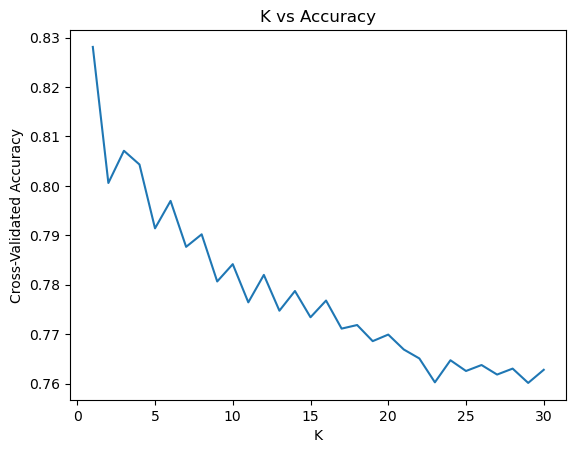

Best K: 1


In [264]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Try K from 1 to 30
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K vs Accuracy')
plt.show()

# Best K
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Best K: {best_k}")


In [318]:
# working with scaled data

In [280]:
X_train_bal

,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.008726,-0.440508,-0.969556,-0.655475,-0.426746,0.328006,1.167552,0.523889,-0.635326,-0.727299,...,0.829057,0.641840,-0.206811,0.906762,-0.515268,-0.564137,1.883422,-0.526097,-0.711341,-0.542396
1,-1.008726,2.270104,-0.969556,-0.655475,0.469998,0.328006,-0.856493,0.523889,-0.635326,1.374951,...,-1.206190,0.808136,0.750766,-1.102826,1.940738,-0.564137,-0.530948,1.900792,-0.711341,-0.542396
2,0.991349,-0.440508,1.031400,1.525611,1.611307,0.328006,-0.856493,-1.908800,-0.635326,-0.727299,...,-1.206190,-1.458479,-0.351719,-1.102826,-0.515268,1.772620,1.883422,-0.526097,-0.711341,-0.542396
3,-1.008726,-0.440508,-0.969556,-0.655475,-0.467507,0.328006,1.167552,0.523889,-0.635326,1.374951,...,0.829057,1.164009,-0.131487,0.906762,-0.515268,-0.564137,-0.530948,1.900792,-0.711341,-0.542396
4,0.991349,-0.440508,-0.969556,-0.655475,-1.282728,0.328006,-0.856493,0.523889,-0.635326,-0.727299,...,-1.206190,-0.635314,-0.991046,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,1.405796,-0.542396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8279,-1.008726,-0.440508,-0.969556,-0.655475,-1.282728,0.328006,-0.856493,0.523889,-0.635326,-0.727299,...,0.829057,-0.091365,-0.983825,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,-0.711341,1.843671
8280,-1.008726,2.270104,1.031400,-0.655475,0.172471,0.328006,1.167552,0.523889,-0.635326,1.374951,...,0.829057,0.555419,0.323709,0.906762,-0.515268,-0.564137,1.883422,-0.526097,-0.711341,-0.542396
8281,0.281128,-0.440508,1.031400,-0.655475,0.105809,0.328006,1.167552,0.523889,-0.635326,-0.727299,...,0.829057,1.164166,0.569471,0.906762,-0.515268,-0.564137,-0.530948,-0.526097,1.405796,-0.542396
8282,0.991349,-0.440508,1.031400,0.896909,-0.195377,0.328006,-0.856493,0.523889,-0.635326,-0.727299,...,0.829057,0.169139,-0.118897,0.906762,-0.515268,-0.564137,1.883422,-0.526097,-0.711341,-0.542396


In [282]:
y_train_bal

,Churn
0,0
1,0
2,0
3,0
4,1
...,...
8279,1
8280,1
8281,1
8282,1


In [290]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_bal, y_train_bal)

y_pred_en = knn.predict(X_train_bal)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_bal, y_pred_en)))

Training-set accuracy score: 0.8973


In [294]:
y_pred_en = knn.predict(X_test)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Training-set accuracy score: 0.6826


In [295]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1022
           1       0.45      0.67      0.53       383

    accuracy                           0.68      1405
   macro avg       0.65      0.68      0.65      1405
weighted avg       0.74      0.68      0.70      1405



In [ ]:
# it is overfitting 

In [314]:
knn = KNeighborsClassifier(n_neighbors=3 , weights='distance')

knn.fit(X_train_bal, y_train_bal)

y_pred_en = knn.predict(X_train_bal)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_bal, y_pred_en)))

Training-set accuracy score: 0.9990


In [315]:
y_pred = knn.predict(X_test)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 0.6804


## Random Forest

In [322]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Test Accuracy:", rf.score(X_test, y_test))


Test Accuracy: 0.7886120996441282


### Hyperparameter tuning 

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define the base model
rf = RandomForestClassifier(random_state=42)

# 2. Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 3. Perform the grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# 5. Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# 6. Evaluate on test set
best_model = grid_search.best_estimator_
print("Test Accuracy:", best_model.score(X_test, y_test))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.7993242236890891
Test Accuracy: 0.802846975088968


| Parameter           | Description                                      |
| ------------------- | ------------------------------------------------ |
| `n_estimators`      | Number of trees in the forest                    |
| `max_depth`         | Max depth of each tree                           |
| `max_features`      | Max number of features to consider at each split |
| `min_samples_split` | Minimum samples required to split a node         |
| `bootstrap`         | Whether to use bootstrapped samples              |


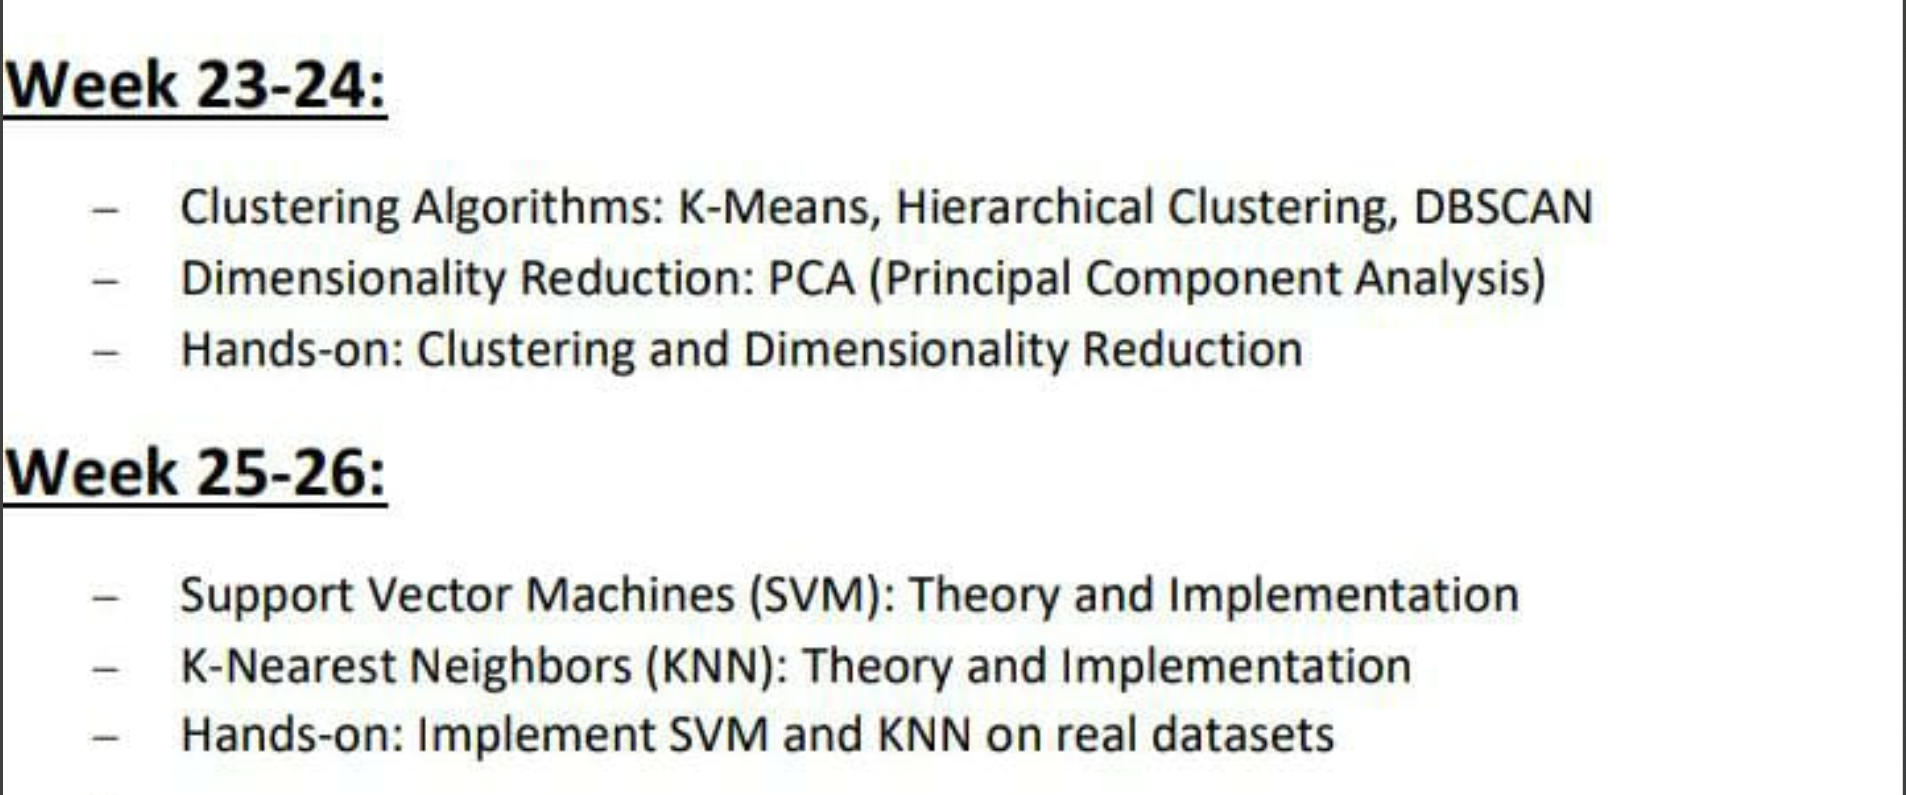  

In [335]:
# Naive Bayes 
# Random Forests
# Clustering
# Multi-Classficiation

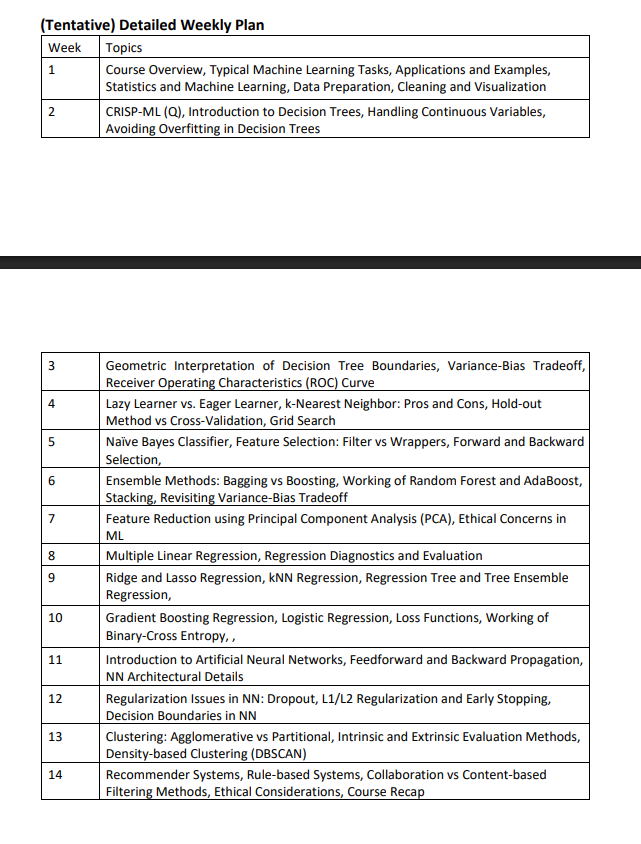